In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../summary_data/original/all_tools_TRB.csv')
df2 = pd.read_csv("../summary_data/original/all_tools_TRB_diversity.csv")

## MIXCR

In [3]:
MIXCR = df[df.nReads_MIXCR != 0]

In [4]:
# Define clonotype groups based on frequency
def clonotype_group (row):
    if row['frequency_MIXCR'] > 0.01 and row['frequency_MIXCR'] <= 1:
        return 'Hyperexpanded'
    if row['frequency_MIXCR'] > 0.001 and row['frequency_MIXCR'] <= 0.01: 
        return 'Large'
    if row['frequency_MIXCR'] > 0.0001 and row['frequency_MIXCR'] <= 0.001:
        return 'Medium'
    if row['frequency_MIXCR'] > 0.00001 and row['frequency_MIXCR'] <= 0.0001:
        return 'Small'
    if row['frequency_MIXCR'] > 0 and row['frequency_MIXCR'] <= 0.00001:
        return 'Rare'

# Apply the clonotype_group function to the dataframe
MIXCR.loc[:,'clonotype_group'] = MIXCR.apply (lambda row: clonotype_group(row),axis=1)

/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [5]:
clonotype_count_MIXCR = MIXCR.groupby(['Sample','clonotype_group'], sort=False).size().reset_index(name='clonotype_count_tool')
clonotype_count_MIXCR['tool'] = 'MIXCR'

In [6]:
MIXCR_TCR = MIXCR[MIXCR.nReads_TCR != 0]
clonotype_count_MIXCR_TCR = MIXCR_TCR.groupby(['Sample','clonotype_group'], sort=False).size().reset_index(name='confirmed_clonotype_count_tool')

In [7]:
MIXCR_confirmed = pd.merge(clonotype_count_MIXCR, clonotype_count_MIXCR_TCR, how='inner', on=['Sample','clonotype_group'])
sample_type = df2[['Sample','tissue','class','tool']]
MIXCR_confirmed = pd.merge(MIXCR_confirmed, sample_type, how='inner', on=['Sample','tool'])
MIXCR_confirmed.loc[:,'confirmed_percentage'] = MIXCR_confirmed['confirmed_clonotype_count_tool']/MIXCR_confirmed['clonotype_count_tool']*100

## IMREP

In [8]:
IMREP = df[df.nReads_IMREP != 0]

In [9]:
# Define clonotype groups based on frequency
def clonotype_group (row):
    if row['frequency_IMREP'] > 0.01 and row['frequency_IMREP'] <= 1:
        return 'Hyperexpanded'
    if row['frequency_IMREP'] > 0.001 and row['frequency_IMREP'] <= 0.01: 
        return 'Large'
    if row['frequency_IMREP'] > 0.0001 and row['frequency_IMREP'] <= 0.001:
        return 'Medium'
    if row['frequency_IMREP'] > 0.00001 and row['frequency_IMREP'] <= 0.0001:
        return 'Small'
    if row['frequency_IMREP'] > 0 and row['frequency_IMREP'] <= 0.00001:
        return 'Rare'

# Apply the clonotype_group function to the dataframe
IMREP.loc[:,'clonotype_group'] = IMREP.apply (lambda row: clonotype_group(row),axis=1)

In [10]:
clonotype_count_IMREP = IMREP.groupby(['Sample','clonotype_group'], sort=False).size().reset_index(name='clonotype_count_tool')
clonotype_count_IMREP['tool'] = 'IMREP'

In [11]:
IMREP_TCR = IMREP[IMREP.nReads_TCR != 0]
clonotype_count_IMREP_TCR = IMREP_TCR.groupby(['Sample','clonotype_group'], sort=False).size().reset_index(name='confirmed_clonotype_count_tool')

In [12]:
IMREP_confirmed = pd.merge(clonotype_count_IMREP, clonotype_count_IMREP_TCR, how='inner', on=['Sample','clonotype_group'])
sample_type = df2[['Sample','tissue','class','tool']]
IMREP_confirmed = pd.merge(IMREP_confirmed, sample_type, how='inner', on=['Sample','tool'])
IMREP_confirmed.loc[:,'confirmed_percentage'] = IMREP_confirmed['confirmed_clonotype_count_tool']/IMREP_confirmed['clonotype_count_tool']*100

## TRUST4

In [13]:
TRUST4 = df[df.nReads_TRUST4 != 0]

In [14]:
# Define clonotype groups based on frequency
def clonotype_group (row):
    if row['frequency_TRUST4'] > 0.01 and row['frequency_TRUST4'] <= 1:
        return 'Hyperexpanded'
    if row['frequency_TRUST4'] > 0.001 and row['frequency_TRUST4'] <= 0.01: 
        return 'Large'
    if row['frequency_TRUST4'] > 0.0001 and row['frequency_TRUST4'] <= 0.001:
        return 'Medium'
    if row['frequency_TRUST4'] > 0.00001 and row['frequency_TRUST4'] <= 0.0001:
        return 'Small'
    if row['frequency_TRUST4'] > 0 and row['frequency_TRUST4'] <= 0.00001:
        return 'Rare'

# Apply the clonotype_group function to the dataframe
TRUST4.loc[:,'clonotype_group'] = TRUST4.apply (lambda row: clonotype_group(row),axis=1)

In [15]:
clonotype_count_TRUST4 = TRUST4.groupby(['Sample','clonotype_group'], sort=False).size().reset_index(name='clonotype_count_tool')
clonotype_count_TRUST4['tool'] = 'TRUST4'

In [16]:
TRUST4_TCR = TRUST4[TRUST4.nReads_TCR != 0]
clonotype_count_TRUST4_TCR = TRUST4_TCR.groupby(['Sample','clonotype_group'], sort=False).size().reset_index(name='confirmed_clonotype_count_tool')

In [17]:
TRUST4_confirmed = pd.merge(clonotype_count_TRUST4, clonotype_count_TRUST4_TCR, how='inner', on=['Sample','clonotype_group'])
sample_type = df2[['Sample','tissue','class','tool']]
TRUST4_confirmed = pd.merge(TRUST4_confirmed, sample_type, how='inner', on=['Sample','tool'])
TRUST4_confirmed.loc[:,'confirmed_percentage'] = TRUST4_confirmed['confirmed_clonotype_count_tool']/TRUST4_confirmed['clonotype_count_tool']*100

## CATT

In [18]:
CATT = df[df.nReads_CATT != 0]

In [19]:
# Define clonotype groups based on frequency
def clonotype_group (row):
    if row['frequency_CATT'] > 0.01 and row['frequency_CATT'] <= 1:
        return 'Hyperexpanded'
    if row['frequency_CATT'] > 0.001 and row['frequency_CATT'] <= 0.01: 
        return 'Large'
    if row['frequency_CATT'] > 0.0001 and row['frequency_CATT'] <= 0.001:
        return 'Medium'
    if row['frequency_CATT'] > 0.00001 and row['frequency_CATT'] <= 0.0001:
        return 'Small'
    if row['frequency_CATT'] > 0 and row['frequency_CATT'] <= 0.00001:
        return 'Rare'

# Apply the clonotype_group function to the dataframe
CATT.loc[:,'clonotype_group'] = CATT.apply (lambda row: clonotype_group(row),axis=1)

In [20]:
clonotype_count_CATT = CATT.groupby(['Sample','clonotype_group'], sort=False).size().reset_index(name='clonotype_count_tool')
clonotype_count_CATT['tool'] = 'CATT'

In [21]:
CATT_TCR = CATT[CATT.nReads_TCR != 0]
clonotype_count_CATT_TCR = CATT_TCR.groupby(['Sample','clonotype_group'], sort=False).size().reset_index(name='confirmed_clonotype_count_tool')

In [22]:
CATT_confirmed = pd.merge(clonotype_count_CATT, clonotype_count_CATT_TCR, how='inner', on=['Sample','clonotype_group'])
sample_type = df2[['Sample','tissue','class','tool']]
CATT_confirmed = pd.merge(CATT_confirmed, sample_type, how='inner', on=['Sample','tool'])
CATT_confirmed.loc[:,'confirmed_percentage'] = CATT_confirmed['confirmed_clonotype_count_tool']/CATT_confirmed['clonotype_count_tool']*100

In [23]:
combined = pd.concat([MIXCR_confirmed,IMREP_confirmed,TRUST4_confirmed,CATT_confirmed])
combined

Sample clonotype_group  clonotype_count_tool   tool  \
0   SRR5233637   Hyperexpanded                    24  MIXCR   
1   SRR5233639   Hyperexpanded                    10  MIXCR   
2   SRR5233639           Large                   343  MIXCR   
3     sample01           Small                  2561  MIXCR   
4     sample01          Medium                    30  MIXCR   
..         ...             ...                   ...    ...   
36    sample13   Hyperexpanded                    10   CATT   
37    sample13           Large                    75   CATT   
38    sample13          Medium                   157   CATT   
39    sample14           Large                    75   CATT   
40    sample14   Hyperexpanded                    11   CATT   

    confirmed_clonotype_count_tool           tissue                 class  \
0                               24  small_intestine  T_cell_poor_high_SDI   
1                               10       lymph_node  T_cell_rich_high_SDI   
2                              330       lymph_node  T_cell_rich_high_SDI   
3                              445             PBMC   T_cell_rich_low_SDI   
4                               27             PBMC   T_cell_rich_low_SDI   
..                             ...              ...                   ...   
36                               3         melanoma   T_cell_poor_low_SDI   
37                               9         melanoma   T_cell_poor_low_SDI   
38                               3         melanoma   T_cell_poor_low_SDI   
39                              33         melanoma  T_cell_poor_high_SDI   
40                               4         melanoma  T_cell_poor_high_SDI   

    confirmed_percentage  
0             100.000000  
1             100.000000  
2              96.209913  
3              17.376025  
4              90.000000  
..                   ...  
36             30.000000  
37             12.000000  
38              1.910828  
39             44.000000  
40             36.363636  

[147 rows x 8 columns]

In [24]:
mean_confirmed_clonotype = combined.groupby(["class","clonotype_group"])["clonotype_count_tool","confirmed_clonotype_count_tool","confirmed_percentage",].agg(["mean", "std"])
display(mean_confirmed_clonotype)
tools = ['MIXCR','IMREP','TRUST4','CATT']              
for tool in tools:
    print(tool)
    df_tool = combined.loc[combined['tool'] == tool]
    mean_confirmed_clonotype_tool = df_tool.groupby(["class","clonotype_group"])["clonotype_count_tool","confirmed_clonotype_count_tool","confirmed_percentage"].agg(["mean", "std"]) 
    display(mean_confirmed_clonotype_tool)

/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


clonotype_count_tool               \
                                                     mean          std   
class                clonotype_group                                     
T_cell_poor_high_SDI Hyperexpanded              16.973684    10.440272   
                     Large                      58.750000    43.394299   
                     Medium                     84.200000    53.049034   
T_cell_poor_low_SDI  Hyperexpanded              20.000000     6.683313   
                     Large                      86.250000    15.129992   
                     Medium                    102.000000    77.781746   
T_cell_rich_high_SDI Hyperexpanded              21.000000    22.422087   
                     Large                     177.500000   166.949950   
                     Medium                   1330.400000   895.410409   
T_cell_rich_low_SDI  Hyperexpanded               1.416667     0.514929   
                     Large                       6.000000     3.041381   
                     Medium                    106.333333    69.778003   
                     Rare                     1202.666667   167.048895   
                     Small                    3067.000000  1142.760215   

                                     confirmed_clonotype_count_tool  \
                                                               mean   
class                clonotype_group                                  
T_cell_poor_high_SDI Hyperexpanded                        12.078947   
                     Large                                30.833333   
                     Medium                               30.000000   
T_cell_poor_low_SDI  Hyperexpanded                         7.250000   
                     Large                                 7.250000   
                     Medium                                2.000000   
T_cell_rich_high_SDI Hyperexpanded                        10.000000   
                     Large                               104.625000   
                     Medium                              910.800000   
T_cell_rich_low_SDI  Hyperexpanded                         1.083333   
                     Large                                 2.444444   
                     Medium                               43.333333   
                     Rare                                128.333333   
                     Small                               370.083333   

                                                 confirmed_percentage  \
                                             std                 mean   
class                clonotype_group                                    
T_cell_poor_high_SDI Hyperexpanded      8.549954            68.144555   
                     Large             27.666754            47.952949   
                     Medium            33.458930            27.469231   
T_cell_poor_low_SDI  Hyperexpanded      2.872281            35.353261   
                     Large              2.061553             8.869459   
                     Medium             1.414214             2.019244   
T_cell_rich_high_SDI Hyperexpanded     11.335784            62.732595   
                     Large            109.162968            58.489564   
                     Medium           784.679043            57.519981   
T_cell_rich_low_SDI  Hyperexpanded      0.288675            83.333333   
                     Large              2.554952            44.669312   
                     Medium            15.610797            50.200575   
                     Rare               3.785939            10.785387   
                     Small            125.384832            13.614770   

                                                 
                                            std  
class                clonotype_group             
T_cell_poor_high_SDI Hyperexpanded    22.004334  
                     Large            19.755340  
                     Medium           18.520671  
T_cell_poor_low_SDI  Hyperex

MIXCR


/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


clonotype_count_tool              \
                                                     mean         std   
class                clonotype_group                                    
T_cell_poor_high_SDI Hyperexpanded              21.750000   13.002747   
                     Large                      25.000000         NaN   
T_cell_poor_low_SDI  Hyperexpanded              23.000000         NaN   
                     Large                      73.000000         NaN   
T_cell_rich_high_SDI Hyperexpanded              30.666667   27.592269   
                     Large                     343.000000         NaN   
T_cell_rich_low_SDI  Hyperexpanded               1.333333    0.577350   
                     Large                       2.000000         NaN   
                     Medium                     44.000000   13.114877   
                     Small                    1677.000000  812.785950   

                                     confirmed_clonotype_count_tool  \
                                                               mean   
class                clonotype_group                                  
T_cell_poor_high_SDI Hyperexpanded                        17.250000   
                     Large                                21.000000   
T_cell_poor_low_SDI  Hyperexpanded                         8.000000   
                     Large                                 9.000000   
T_cell_rich_high_SDI Hyperexpanded                        18.333333   
                     Large                               330.000000   
T_cell_rich_low_SDI  Hyperexpanded                         1.000000   
                     Large                                 2.000000   
                     Medium                               35.000000   
                     Small                               280.000000   

                                                 confirmed_percentage  \
                                             std                 mean   
class                clonotype_group                                    
T_cell_poor_high_SDI Hyperexpanded     10.511898            76.436869   
                     Large                   NaN            84.000000   
T_cell_poor_low_SDI  Hyperexpanded           NaN            34.782609   
                     Large                   NaN            12.328767   
T_cell_rich_high_SDI Hyperexpanded     17.097758            65.430108   
                     Large                   NaN            96.209913   
T_cell_rich_low_SDI  Hyperexpanded      0.000000            83.333333   
                     Large                   NaN           100.000000   
                     Medium             8.000000            81.992754   
                     Small            156.368155            17.797648   

                                                 
                                            std  
class                clonotype_group             
T_cell_poor_high_SDI Hyperexpanded    19.663884  
                     Large                  NaN  
T_cell_poor_low_SDI  Hyperexpanded          NaN  
                     Large                  NaN  
T_cell_rich_high_SDI Hyperexpanded    32.697146  
                     Large                  NaN  
T_cell_rich_low_SDI  Hyperexpanded    28.867513  
                     Large                  NaN  
                     Medium           16.970567  
                     Small             9.129822

IMREP


/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


clonotype_count_tool              \
                                                     mean         std   
class                clonotype_group                                    
T_cell_poor_high_SDI Hyperexpanded              16.000000   12.358288   
                     Large                      64.750000   28.628366   
T_cell_poor_low_SDI  Hyperexpanded              24.000000         NaN   
                     Large                      92.000000         NaN   
T_cell_rich_high_SDI Hyperexpanded              12.333333   17.897858   
                     Large                     290.500000  324.562013   
                     Medium                   2279.000000         NaN   
T_cell_rich_low_SDI  Hyperexpanded               1.333333    0.577350   
                     Large                       5.333333    1.527525   
                     Medium                    173.000000   99.201814   
                     Rare                     1038.000000         NaN   
                     Small                    3336.666667  776.662303   

                                     confirmed_clonotype_count_tool  \
                                                               mean   
class                clonotype_group                                  
T_cell_poor_high_SDI Hyperexpanded                        11.333333   
                     Large                                42.750000   
T_cell_poor_low_SDI  Hyperexpanded                         9.000000   
                     Large                                 5.000000   
T_cell_rich_high_SDI Hyperexpanded                         4.333333   
                     Large                               130.000000   
                     Medium                             1727.000000   
T_cell_rich_low_SDI  Hyperexpanded                         1.333333   
                     Large                                 2.000000   
                     Medium                               51.000000   
                     Rare                                124.000000   
                     Small                               382.666667   

                                                 confirmed_percentage  \
                                             std                 mean   
class                clonotype_group                                    
T_cell_poor_high_SDI Hyperexpanded      8.315739            75.141155   
                     Large             18.803812            66.224832   
T_cell_poor_low_SDI  Hyperexpanded           NaN            37.500000   
                     Large                   NaN             5.434783   
T_cell_rich_high_SDI Hyperexpanded      4.932883            60.101010   
                     Large            100.409163            67.687579   
                     Medium                  NaN            75.778850   
T_cell_rich_low_SDI  Hyperexpanded      0.577350           100.000000   
                     Large              1.000000            37.619048   
                     Medium            21.000000            32.084572   
                     Rare                    NaN            11.946050   
                     Small            131.910323            12.339247   

                                                 
                                            std  
class                clonotype_group             
T_cell_poor_high_SDI Hyperexpanded    16.952341  
                     Large             5.577507  
T_cell_poor_low_SDI  Hyperexpanded          NaN  
                     Large                  NaN  
T_cell_rich_high_SDI Hyperexpanded    35.929649  
                     Large            41.059898  
                     Medium                 NaN  
T_cell_rich_low_SDI  Hyperexpanded     0.000000  
                     Large            15.670936  
                     Medium           11.573288  
                     Rare                   NaN  
                     Small             5.914773

TRUST4


/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


clonotype_count_tool               \
                                                     mean          std   
class                clonotype_group                                     
T_cell_poor_high_SDI Hyperexpanded              18.083333     7.727852   
                     Large                      64.888889    56.503196   
T_cell_poor_low_SDI  Hyperexpanded              23.000000          NaN   
                     Large                     105.000000          NaN   
                     Medium                     47.000000          NaN   
T_cell_rich_high_SDI Hyperexpanded              20.000000    25.980762   
                     Large                     120.000000    38.183766   
                     Medium                   1406.500000  1212.688130   
T_cell_rich_low_SDI  Hyperexpanded               1.000000     0.000000   
                     Large                       7.333333     4.618802   
                     Medium                    134.333333    32.624122   
                     Rare                     1198.000000          NaN   
                     Small                    3908.666667  1128.593077   

                                     confirmed_clonotype_count_tool  \
                                                               mean   
class                clonotype_group                                  
T_cell_poor_high_SDI Hyperexpanded                        13.583333   
                     Large                                38.444444   
T_cell_poor_low_SDI  Hyperexpanded                         9.000000   
                     Large                                 6.000000   
                     Medium                                1.000000   
T_cell_rich_high_SDI Hyperexpanded                         7.333333   
                     Large                                81.000000   
                     Medium                              959.500000   
T_cell_rich_low_SDI  Hyperexpanded                         1.000000   
                     Large                                 4.000000   
                     Medium                               53.000000   
                     Rare                                131.000000   
                     Small                               436.333333   

                                                  confirmed_percentage  \
                                              std                 mean   
class                clonotype_group                                     
T_cell_poor_high_SDI Hyperexpanded       6.598324            72.540079   
                     Large              36.575645            51.526628   
T_cell_poor_low_SDI  Hyperexpanded            NaN            39.130435   
                     Large                    NaN             5.714286   
                     Medium                   NaN             2.127660   
T_cell_rich_high_SDI Hyperexpanded       5.859465            62.666667   
                     Large              12.727922            72.876893   
                     Medium           1086.823123            55.557808   
T_cell_rich_low_SDI  Hyperexpanded       0.000000           100.000000   
                     Large               4.358899            53.333333   
                     Medium             10.535654            41.581474   
                     Rare                     NaN            10.934891   
                     Small             110.192256            12.216892   

                                                 
                                            std  
class                clonotype_group             
T_cell_poor_high_SDI Hyperexpanded    16.498057  
                     Large            17.860009  
T_cell_poor_low_SDI  Hyperexpanded          NaN  
                     Large                  NaN  
                     Medium                 NaN  
T_cell_rich_high_SDI Hyperexpanded    36.073998  
                     Large            33.795887  
                     Medium   

CATT


/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


clonotype_count_tool              \
                                                     mean         std   
class                clonotype_group                                    
T_cell_poor_high_SDI Hyperexpanded              10.333333    2.804758   
                     Large                      54.200000   38.703431   
                     Medium                     84.200000   53.049034   
T_cell_poor_low_SDI  Hyperexpanded              10.000000         NaN   
                     Large                      75.000000         NaN   
                     Medium                    157.000000         NaN   
T_cell_rich_high_SDI Large                      85.333333   40.513372   
                     Medium                    780.000000  468.104689   
T_cell_rich_low_SDI  Hyperexpanded               2.000000    0.000000   
                     Large                       7.000000    1.414214   
                     Medium                     74.000000   21.517435   
                     Rare                     1372.000000         NaN   
                     Small                    3345.666667  677.192981   

                                     confirmed_clonotype_count_tool  \
                                                               mean   
class                clonotype_group                                  
T_cell_poor_high_SDI Hyperexpanded                         3.666667   
                     Large                                20.200000   
                     Medium                               30.000000   
T_cell_poor_low_SDI  Hyperexpanded                         3.000000   
                     Large                                 9.000000   
                     Medium                                3.000000   
T_cell_rich_high_SDI Large                                28.333333   
                     Medium                              454.000000   
T_cell_rich_low_SDI  Hyperexpanded                         1.000000   
                     Large                                 1.000000   
                     Medium                               34.333333   
                     Rare                                130.000000   
                     Small                               381.333333   

                                                 confirmed_percentage  \
                                             std                 mean   
class                clonotype_group                                    
T_cell_poor_high_SDI Hyperexpanded      1.966384            34.303891   
                     Large             19.792254            33.823179   
                     Medium            33.458930            27.469231   
T_cell_poor_low_SDI  Hyperexpanded           NaN            30.000000   
                     Large                   NaN            12.000000   
                     Medium                  NaN             1.910828   
T_cell_rich_high_SDI Large             35.444793            30.192552   
                     Medium           439.820418            50.352719   
T_cell_rich_low_SDI  Hyperexpanded      0.000000            50.000000   
                     Large              0.000000            14.583333   
                     Medium            16.441817            45.143500   
                     Rare                    NaN             9.475219   
                     Small            115.283708            12.105295   

                                                 
                                            std  
class                clonotype_group             
T_cell_poor_high_SDI Hyperexpanded    12.748443  
                     Large            13.270028  
                     Medium           18.520671  
T_cell_poor_low_SDI  Hyperexpanded          NaN  
                     Large                  NaN  
                     Medium                 NaN  
T_cell_rich_high_SDI Large            34.827844  
                     Medium           26.168843  
T_cell_rich_

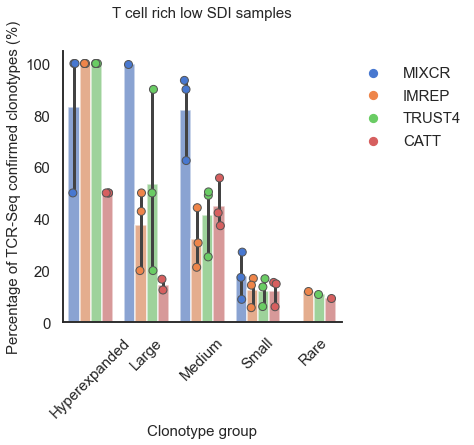

In [25]:
T_cell_rich_low_SDI = combined.loc[combined['class'] == 'T_cell_rich_low_SDI']

sns.set_style("white") 
sns.set_context("talk")  

ax = plt.subplots(figsize = (5,5))

ax = sns.barplot(x='clonotype_group',y='confirmed_percentage',data=T_cell_rich_low_SDI,palette="muted",alpha=0.7,
                 hue='tool',order=['Hyperexpanded','Large','Medium','Small','Rare'],errwidth=3)
sns.stripplot(x="clonotype_group",y="confirmed_percentage",data=T_cell_rich_low_SDI,s=8,palette="muted",
              hue='tool',order=['Hyperexpanded','Large','Medium','Small','Rare'],dodge=True,linewidth=1)
plt.ylim(0,105)

ax.set_xlabel('Clonotype group',fontsize=15)
ax.set_ylabel('Percentage of TCR-Seq confirmed clonotypes (%)',fontsize=15)
plt.title('T cell rich low SDI samples',y=1.1,fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=45)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1, 1),frameon=False)
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()

plt.savefig("../figures/supplementary/figureS10/figureS10g.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS10/figureS10g.png",bbox_inches="tight")

plt.show()

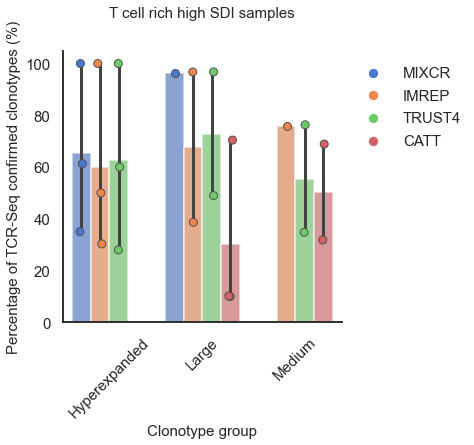

In [26]:
T_cell_rich_high_SDI = combined.loc[combined['class'] == 'T_cell_rich_high_SDI']

sns.set_style("white") 
sns.set_context("talk")  

ax = plt.subplots(figsize = (5,5))

ax = sns.barplot(x='clonotype_group',y='confirmed_percentage',data=T_cell_rich_high_SDI,palette="muted",alpha=0.7,
                 hue='tool',order=['Hyperexpanded','Large','Medium'],errwidth=3)
sns.stripplot(x="clonotype_group",y="confirmed_percentage",data=T_cell_rich_high_SDI,s=8,palette="muted",
              hue='tool',order=['Hyperexpanded','Large','Medium'],dodge=True,linewidth=1)
plt.ylim(0,105)

ax.set_xlabel('Clonotype group',fontsize=15)
ax.set_ylabel('Percentage of TCR-Seq confirmed clonotypes (%)',fontsize=15)
plt.title('T cell rich high SDI samples',y=1.1,fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=45)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1, 1),frameon=False)
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()

plt.savefig("../figures/supplementary/figureS10/figureS10h.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS10/figureS10h.png",bbox_inches="tight")

plt.show()

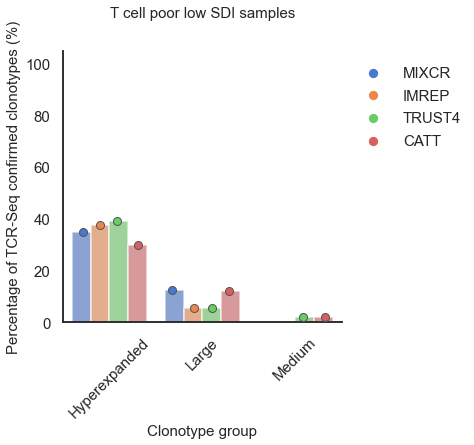

In [27]:
T_cell_poor_low_SDI = combined.loc[combined['class'] == 'T_cell_poor_low_SDI']

sns.set_style("white") 
sns.set_context("talk")  

ax = plt.subplots(figsize = (5,5))

ax = sns.barplot(x='clonotype_group',y='confirmed_percentage',data=T_cell_poor_low_SDI,palette="muted",alpha=0.7,
                 hue='tool',order=['Hyperexpanded','Large','Medium'],errwidth=3)
sns.stripplot(x="clonotype_group",y="confirmed_percentage",data=T_cell_poor_low_SDI,s=8,palette="muted",
              hue='tool',order=['Hyperexpanded','Large','Medium'],dodge=True,linewidth=1)
plt.ylim(0,105)

ax.set_xlabel('Clonotype group',fontsize=15)
ax.set_ylabel('Percentage of TCR-Seq confirmed clonotypes (%)',fontsize=15)
plt.title('T cell poor low SDI samples',y=1.1,fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=45)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1, 1),frameon=False)
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()

plt.savefig("../figures/supplementary/figureS10/figureS10i.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS10/figureS10i.png",bbox_inches="tight")

plt.show()

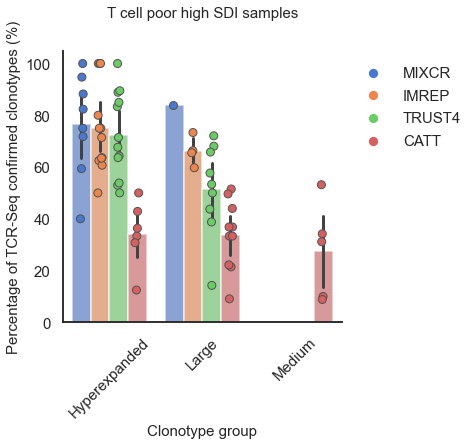

In [28]:
T_cell_poor_high_SDI = combined.loc[combined['class'] == 'T_cell_poor_high_SDI']

sns.set_style("white") 
sns.set_context("talk")  

ax = plt.subplots(figsize = (5,5))

ax = sns.barplot(x='clonotype_group',y='confirmed_percentage',data=T_cell_poor_high_SDI,palette="muted",alpha=0.7,
                 hue='tool',order=['Hyperexpanded','Large','Medium'],errwidth=3)
sns.stripplot(x="clonotype_group",y="confirmed_percentage",data=T_cell_poor_high_SDI,s=8,palette="muted",
              hue='tool',order=['Hyperexpanded','Large','Medium'],dodge=True,linewidth=1)
plt.ylim(0,105)

ax.set_xlabel('Clonotype group',fontsize=15)
ax.set_ylabel('Percentage of TCR-Seq confirmed clonotypes (%)',fontsize=15)
plt.title('T cell poor high SDI samples',y=1.1,fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=45)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1, 1),frameon=False)
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()

plt.savefig("../figures/supplementary/figureS10/figureS10j.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS10/figureS10j.png",bbox_inches="tight")

plt.show()